In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

In [2]:
basics = pd.read_table('data/title.basics.tsv')
ratings = pd.read_table('data/title.ratings.tsv')

basics.set_index('tconst', inplace=True)
ratings.set_index('tconst', inplace=True)

GENRE = 'Sci-Fi'
mask = basics.genres.str.contains(GENRE).fillna(False)

scifi_basics = basics.loc[mask]
scifi_basics = scifi_basics.join(ratings)

scifi_movies = scifi_basics.loc[scifi_basics.titleType == 'movie']

nulls = (scifi_movies.startYear == '\\N') | (scifi_movies.averageRating.isnull() | scifi_movies.numVotes.isnull())

scifi_movies = scifi_movies.loc[~nulls]

scifi_movies['startYear'] = scifi_movies.startYear.astype(int)
scifi_movies['decade'] = scifi_movies.startYear//10*10
scifi_movies['qcent'] = scifi_movies.startYear//25*25

print(len(scifi_movies))

/Users/mac/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


6762


In [107]:
def compute_score(grp, suffix=''):
    
    rtg_std = (grp.averageRating - grp.averageRating.mean()) / grp.averageRating.std()
    vote_std = (grp.numVotes - grp.numVotes.mean()) / grp.numVotes.std()
    
    grp['rtg_std' + suffix] = rtg_std
    grp['vote_std' + suffix] = vote_std
    grp['score' + suffix] = 0.5*rtg_std + 0.5*vote_std
    
    return grp

scifi_movies = scifi_movies.groupby('startYear').apply(compute_score)
scifi_movies = scifi_movies.groupby('decade').apply(compute_score, suffix='_decade')
scifi_movies = scifi_movies.groupby('qcent').apply(compute_score, suffix='_qcent')

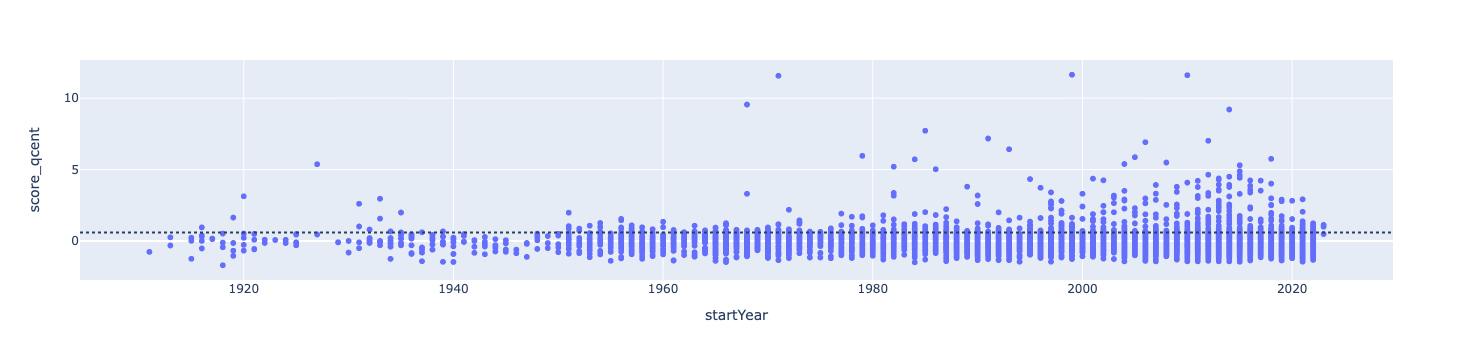

In [108]:
fig = px.scatter(scifi_movies, 'startYear', 'score_qcent', hover_name='primaryTitle')

fig.add_hline(y=0.6, line_dash="dot",
#               annotation_text="Jan 1, 2018 baseline", 
#               annotation_position="bottom right",
#               annotation_font_size=20,
#               annotation_font_color="blue"
             )

In [141]:
def pick_max(grp, by='score', n=1):
    return grp.sort_values(by=by).tail(n).primaryTitle

mask = scifi_movies.startYear.between(1900, 1949)
tmp = scifi_movies.loc[mask].groupby('decade').apply(pick_max, by='score_decade', n=1)
top_movies = tmp

mask = scifi_movies.startYear.between(1950, 1969)
tmp = scifi_movies.loc[mask].groupby('decade').apply(pick_max, by='score_decade', n=2)
top_movies = pd.concat([top_movies, tmp])

mask = scifi_movies.startYear.between(1970, 1999)
tmp = scifi_movies.loc[mask].groupby('decade').apply(pick_max, by='score_decade', n=3)
top_movies = pd.concat([top_movies, tmp])

mask = scifi_movies.startYear.between(2000, 2023)
tmp = scifi_movies.loc[mask].groupby('decade').apply(pick_max, by='score_decade', n=4)
top_movies = pd.concat([top_movies, tmp])

top_movies = top_movies.reset_index()

top_movies

,decade,tconst,primaryTitle
0,1910,tt0010600,The Doll
1,1920,tt0017136,Metropolis
2,1930,tt0024216,King Kong
3,1940,tt0033553,Dr. Jekyll and Mr. Hyde
4,1950,tt0049366,Invasion of the Body Snatchers
5,1950,tt0043456,The Day the Earth Stood Still
6,1960,tt0063442,Planet of the Apes
7,1960,tt0062622,2001: A Space Odyssey
8,1970,tt0075860,Close Encounters of the Third Kind
9,1970,tt0066921,A Clockwork Orange


In [142]:
scifi_movies['in_top'] = scifi_movies.index.isin(top_movies.tconst)

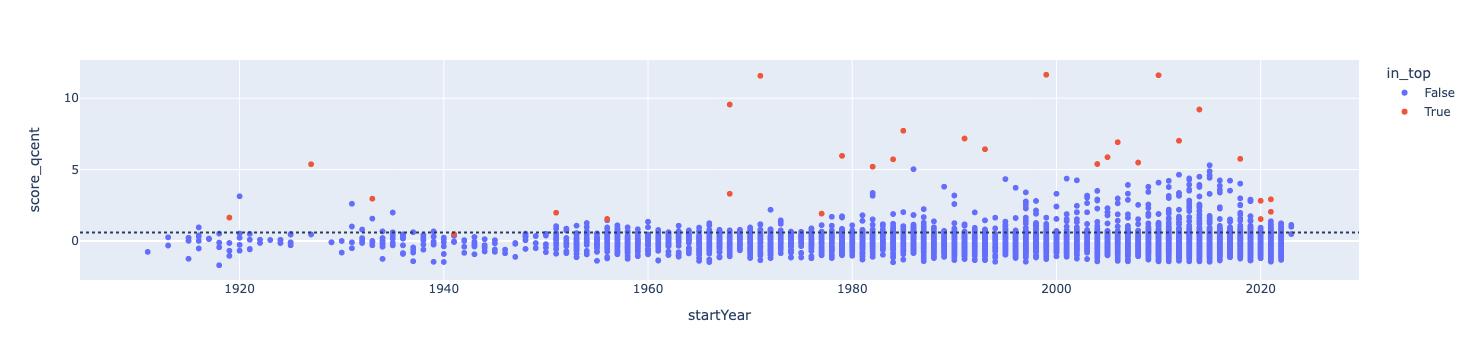

In [143]:
fig = px.scatter(scifi_movies, 'startYear', 'score_qcent', hover_name='primaryTitle', color='in_top')

fig.add_hline(y=0.6, line_dash="dot",
#               annotation_text="Jan 1, 2018 baseline", 
#               annotation_position="bottom right",
#               annotation_font_size=20,
#               annotation_font_color="blue"
             )

<AxesSubplot:>

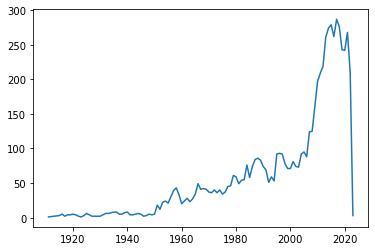

In [137]:
scifi_movies.startYear.value_counts().sort_index().plot()

In [135]:
top_movies

,decade,tconst,primaryTitle
0,1910,tt0010600,The Doll
1,1920,tt0017136,Metropolis
2,1930,tt0024216,King Kong
3,1940,tt0033553,Dr. Jekyll and Mr. Hyde
4,1950,tt0042393,Destination Moon
5,1950,tt0049366,Invasion of the Body Snatchers
6,1950,tt0043456,The Day the Earth Stood Still
7,1960,tt0060390,Fahrenheit 451
8,1960,tt0054387,The Time Machine
9,1960,tt0064112,Kureji no buchamukure daihakken


In [145]:
scifi_movies.loc[scifi_movies.in_top].to_csv('data/top_movies_20230118.csv', index=True)

In [157]:
mask = scifi_movies.startYear.between(2020, 2023)
scifi_movies.loc[mask].sort_values(by='score_decade', ascending=False).head(7)

,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,...,vote_std,score,rtg_std_decade,vote_std_decade,score_decade,in_top,qcent,rtg_std_qcent,vote_std_qcent,score_qcent
tconst,,,,,,,,,,,,,,,,,,,,,
tt11286314,movie,Don't Look Up,Don't Look Up,0,2021,\N,138,"Comedy,Drama,Sci-Fi",7.2,540466.0,...,11.182623,6.169800,1.054358,14.242905,7.648631,True,2000,1.178642,4.657394,2.918018
tt6723592,movie,Tenet,Tenet,0,2020,\N,150,"Action,Sci-Fi,Thriller",7.3,510284.0,...,13.442915,7.404376,1.111816,13.438383,7.275100,True,2000,1.242376,4.385702,2.814039
tt3480822,movie,Black Widow,Black Widow,0,2021,\N,134,"Action,Adventure,Sci-Fi",6.7,381949.0,...,7.849370,4.362768,0.767066,10.017527,5.392296,True,2000,0.859967,3.230457,2.045212
tt8332922,movie,A Quiet Place Part II,A Quiet Place Part II,0,2020,\N,97,"Drama,Horror,Sci-Fi",7.2,233325.0,...,6.060786,3.681755,1.054358,6.055854,3.555106,True,2000,1.178642,1.892573,1.535607
tt10838180,movie,The Matrix Resurrections,The Matrix Resurrections,0,2021,\N,148,"Action,Sci-Fi",5.7,252448.0,...,5.126257,2.720403,0.192482,6.565590,3.379036,False,2000,0.222618,2.064715,1.143667
tt7097896,movie,Venom: Let There Be Carnage,Venom: Let There Be Carnage,0,2021,\N,97,"Action,Adventure,Sci-Fi",5.9,227163.0,...,4.594570,2.510721,0.307399,5.891601,3.099500,False,2000,0.350088,1.837104,1.093596
tt5034838,movie,Godzilla vs. Kong,Godzilla vs. Kong,0,2021,\N,113,"Action,Sci-Fi,Thriller",6.3,211973.0,...,4.275159,2.463339,0.537232,5.486702,3.011967,False,2000,0.605028,1.700367,1.152697
